In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
%matplotlib inline
from scipy import stats


In [3]:
from sklearn.datasets import load_diabetes
diabete= load_diabetes()
diabete

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [4]:
targett= diabete.target
targett

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [5]:
# Transformer les données en DataFrame
diab = pd.DataFrame(diabete.data, columns=diabete.feature_names)
# Afficher les 5 premières lignes
diab['Target']= targett
diab.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [6]:
diabete.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [7]:
diab.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


In [8]:
diab.corr()['Target'].sort_values

<bound method Series.sort_values of age       0.187889
sex       0.043062
bmi       0.586450
bp        0.441484
s1        0.212022
s2        0.174054
s3       -0.394789
s4        0.430453
s5        0.565883
s6        0.382483
Target    1.000000
Name: Target, dtype: float64>

In [9]:
diab.isnull().sum()[diab.isnull().sum()>0]

Series([], dtype: int64)

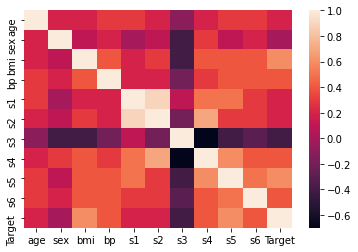

In [10]:
matrice_corr= diab.corr().round(1)
sns.heatmap(matrice_corr )

In [11]:
bonvals=['s5','bmi','bp']

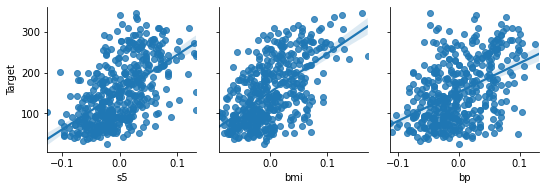

In [12]:
diab.set_index('Target')
sns.pairplot(diab, x_vars=bonvals ,y_vars=['Target'], kind='reg')

In [13]:
print(diab[['bmi','bp']].corr())


          bmi        bp
bmi  1.000000  0.395415
bp   0.395415  1.000000


In [14]:

X = diab[bonvals]
y = diab.Target

In [15]:
linreg = LinearRegression()
linreg.fit(X, y)
for line in zip(bonvals,linreg.coef_):
    print(line)
print(linreg.intercept_)
print(linreg.coef_)


('s5', 543.8724501400325)
('bmi', 603.0743557520988)
('bp', 262.2748839219539)
152.1334841628966
[543.87245014 603.07435575 262.27488392]


In [16]:
pearson_coef, p_value = stats.pearsonr(diab['s5'], diab['Target'])
print("Coefficient de correlation :", pearson_coef, " avec P-value =", p_value)
pearson_coef, p_value = stats.pearsonr(diab['bmi'], diab['Target'])
print("Coefficient de correlation :", pearson_coef, " avec P-value =", p_value)
pearson_coef, p_value = stats.pearsonr(diab['bp'], diab['Target'])
print("Coefficient de correlation :", pearson_coef, " avec P-value =", p_value)


Coefficient de correlation : 0.5658834252428095  avec P-value = 8.823754157324818e-39
Coefficient de correlation : 0.5864501344746887  avec P-value = 3.4660064451654114e-42
Coefficient de correlation : 0.4414838489308861  avec P-value = 1.6485327478610998e-22


In [17]:
from sklearn.metrics import mean_squared_error
lm = LinearRegression()
Z =diab[['bmi','bp','s5','s1','s6']]
lm.fit(Z, diab['Target'])
# R^2
print('Le R-square est: ', lm.score(Z, diab['Target']))

Le R-square est:  0.49312213761997814


In [18]:
def train_test_rmse(bonvals):
    X = diab[bonvals]
    y = diab.Target
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))


train_test_rmse(bonvals)

52.46175494474182

In [19]:
def train_test_rmse(caract):
    X = diab[['bmi','bp','s5','s1','s6']]
    y = diab.Target
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))


train_test_rmse(X)

52.889340824033056

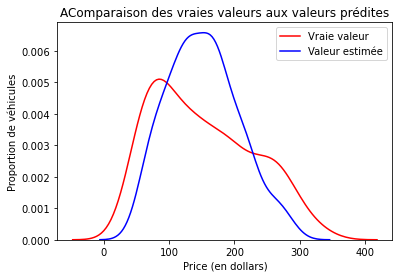

In [20]:

Y_hat = lm.predict(Z)



ax1 = sns.distplot(diab['Target'], hist=False, color="r", label="Vraie valeur")
sns.distplot(Y_hat, hist=False, color="b", label="Valeur estimée" , ax=ax1)


plt.title('AComparaison des vraies valeurs aux valeurs prédites')
plt.xlabel('Price (en dollars)')
plt.ylabel('Proportion de véhicules')

plt.show()
plt.close()